# Lab_01-2 데이터 전처리

### Context
#### Scaling
+ Min-Max Normalize
+ Standard Normalize

#### Imputation
+ Mean, Median, Mode Imputation
+ Iterative Imputation

#### Dimensionality Reduction
+ PCA(Principle Component Analysis)

#### Categorical Variable to Numeric Variable
+ Label Encoding
+ One-hot Encoding

"Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.

This approach may be generally referred to as fully conditional specification (FCS) or multivariate imputation by chained equations (MICE)."

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn


In [2]:
example_file = join('data', join('Hospital', 'train.csv'))
#join 이 걍 파일 경로에서 \라고 생각!

#### 데이터 정보

    train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보 
    test.csv - 폐업 여부를 제외하고 train.csv와 동일 
    sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1, close 예측일 경우 0.



    inst_id - 각 파일에서의 병원 고유 번호
    OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함
    sido – 병원의 광역 지역 정보
    sgg – 병원의 시군구 자료
    openDate – 병원 설립일
    bedCount - 병원이 갖추고 있는 병상의 수
    instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
    ·        종합병원 : 입원환자 100명 이상 수용 가능
    ·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능
    ·        의원 : 입원 환자 30명 이하 수용 가능
    ·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  
    revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함
    salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함
    sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함
    salary1 – 급여, 2017(회계년도)년 데이터를 의미함
    noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함
    noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함
    Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함
    ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함
    Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함
    liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함
    quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함
    receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함
    inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함
    nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함
    tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함
    OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함
    receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함
    debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함
    liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함
    shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함
    NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함
    longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함
    netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함
    surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함
    revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함
    salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함
    sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함
    salary2 – 급여, 2016(회계년도)년 데이터를 의미함
    noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함
    noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함
    interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함
    ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함
    profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함
    liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함
    quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함
    receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함
    inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함
    nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함
    tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함
    OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함
    receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함
    Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함
    liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함
    shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함
    NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함
    longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함
    netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함
    surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함
    employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함
    employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함
    ownerChange – 대표자의 변동 

In [3]:
data = pd.read_csv(example_file)
label = data['OC']#OC가 예측하려는 column값이다
#예측 하려는 column을 어떻게 판단하냐?->이것은 test data와 train data와 비교해서,
#train data에 없는 column을 찾으면 된다!!

df.head() 함수로 맨앞 5개의 데이터를 확인할 수 있습니다.

In [4]:
data.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [5]:
data.shape

(301, 58)

Pandas DataFrame에서 특정 컬럼을 제거하는 방법은 df.drop(컬럼리스트) 또는 del df[컬럼이름] 을 사용해 제거할 수 있습니다.

In [6]:
del data['OC']

개/폐업 컬럼이 제거되었습니다.

In [7]:
data.head()

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


df.describe() 함수는 각 변수별 평균, 표준편차, 최대, 최소, 사분위수 등의 기초 통계량을 확인할 수 있습니다.

In [8]:
data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


df.info() 함수로 각 변수들의 자료형을 확인할 수 있습니다.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   sido                301 non-null    object 
 2   sgg                 301 non-null    int64  
 3   openDate            301 non-null    int64  
 4   bedCount            296 non-null    float64
 5   instkind            300 non-null    object 
 6   revenue1            293 non-null    float64
 7   salescost1          293 non-null    float64
 8   sga1                293 non-null    float64
 9   salary1             293 non-null    float64
 10  noi1                293 non-null    float64
 11  noe1                293 non-null    float64
 12  interest1           293 non-null    float64
 13  ctax1               293 non-null    float64
 14  profit1             293 non-null    float64
 15  liquidAsset1        293 non-null    float64
 16  quickAss

In [10]:
cat_columns = data.select_dtypes("object").columns# cat_columns를 직접 뽑는게 아니라, object('O')를 알아서 뽑는 코드
#X.select_dtypes("number").columns
num_columns = [c for c in data.columns if c not in cat_columns]

print('Categorical columns: \n{}\n\nNumeric columns: \n{}\n'.format(cat_columns, num_columns))

Categorical columns: 
Index(['sido', 'instkind', 'ownerChange'], dtype='object')

Numeric columns: 
['inst_id', 'sgg', 'openDate', 'bedCount', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2']



In [11]:
# DF.info에서 Object type을 가진 컬럼은 모두 범주형 변수
#cat_columns = ['sido', 'instkind', 'ownerChange'] 
#num_columns = [c for c in data.columns if c not in cat_columns]
#num_columns는 data.columns들의 값(c)들이 들어간다, 근데 이게 cat_columns에 없는 경우에만 들어간다
#print('Categorical Columns: \n{}\n\n Numeric Columns: \n{}\n'.format(cat_columns, num_columns))

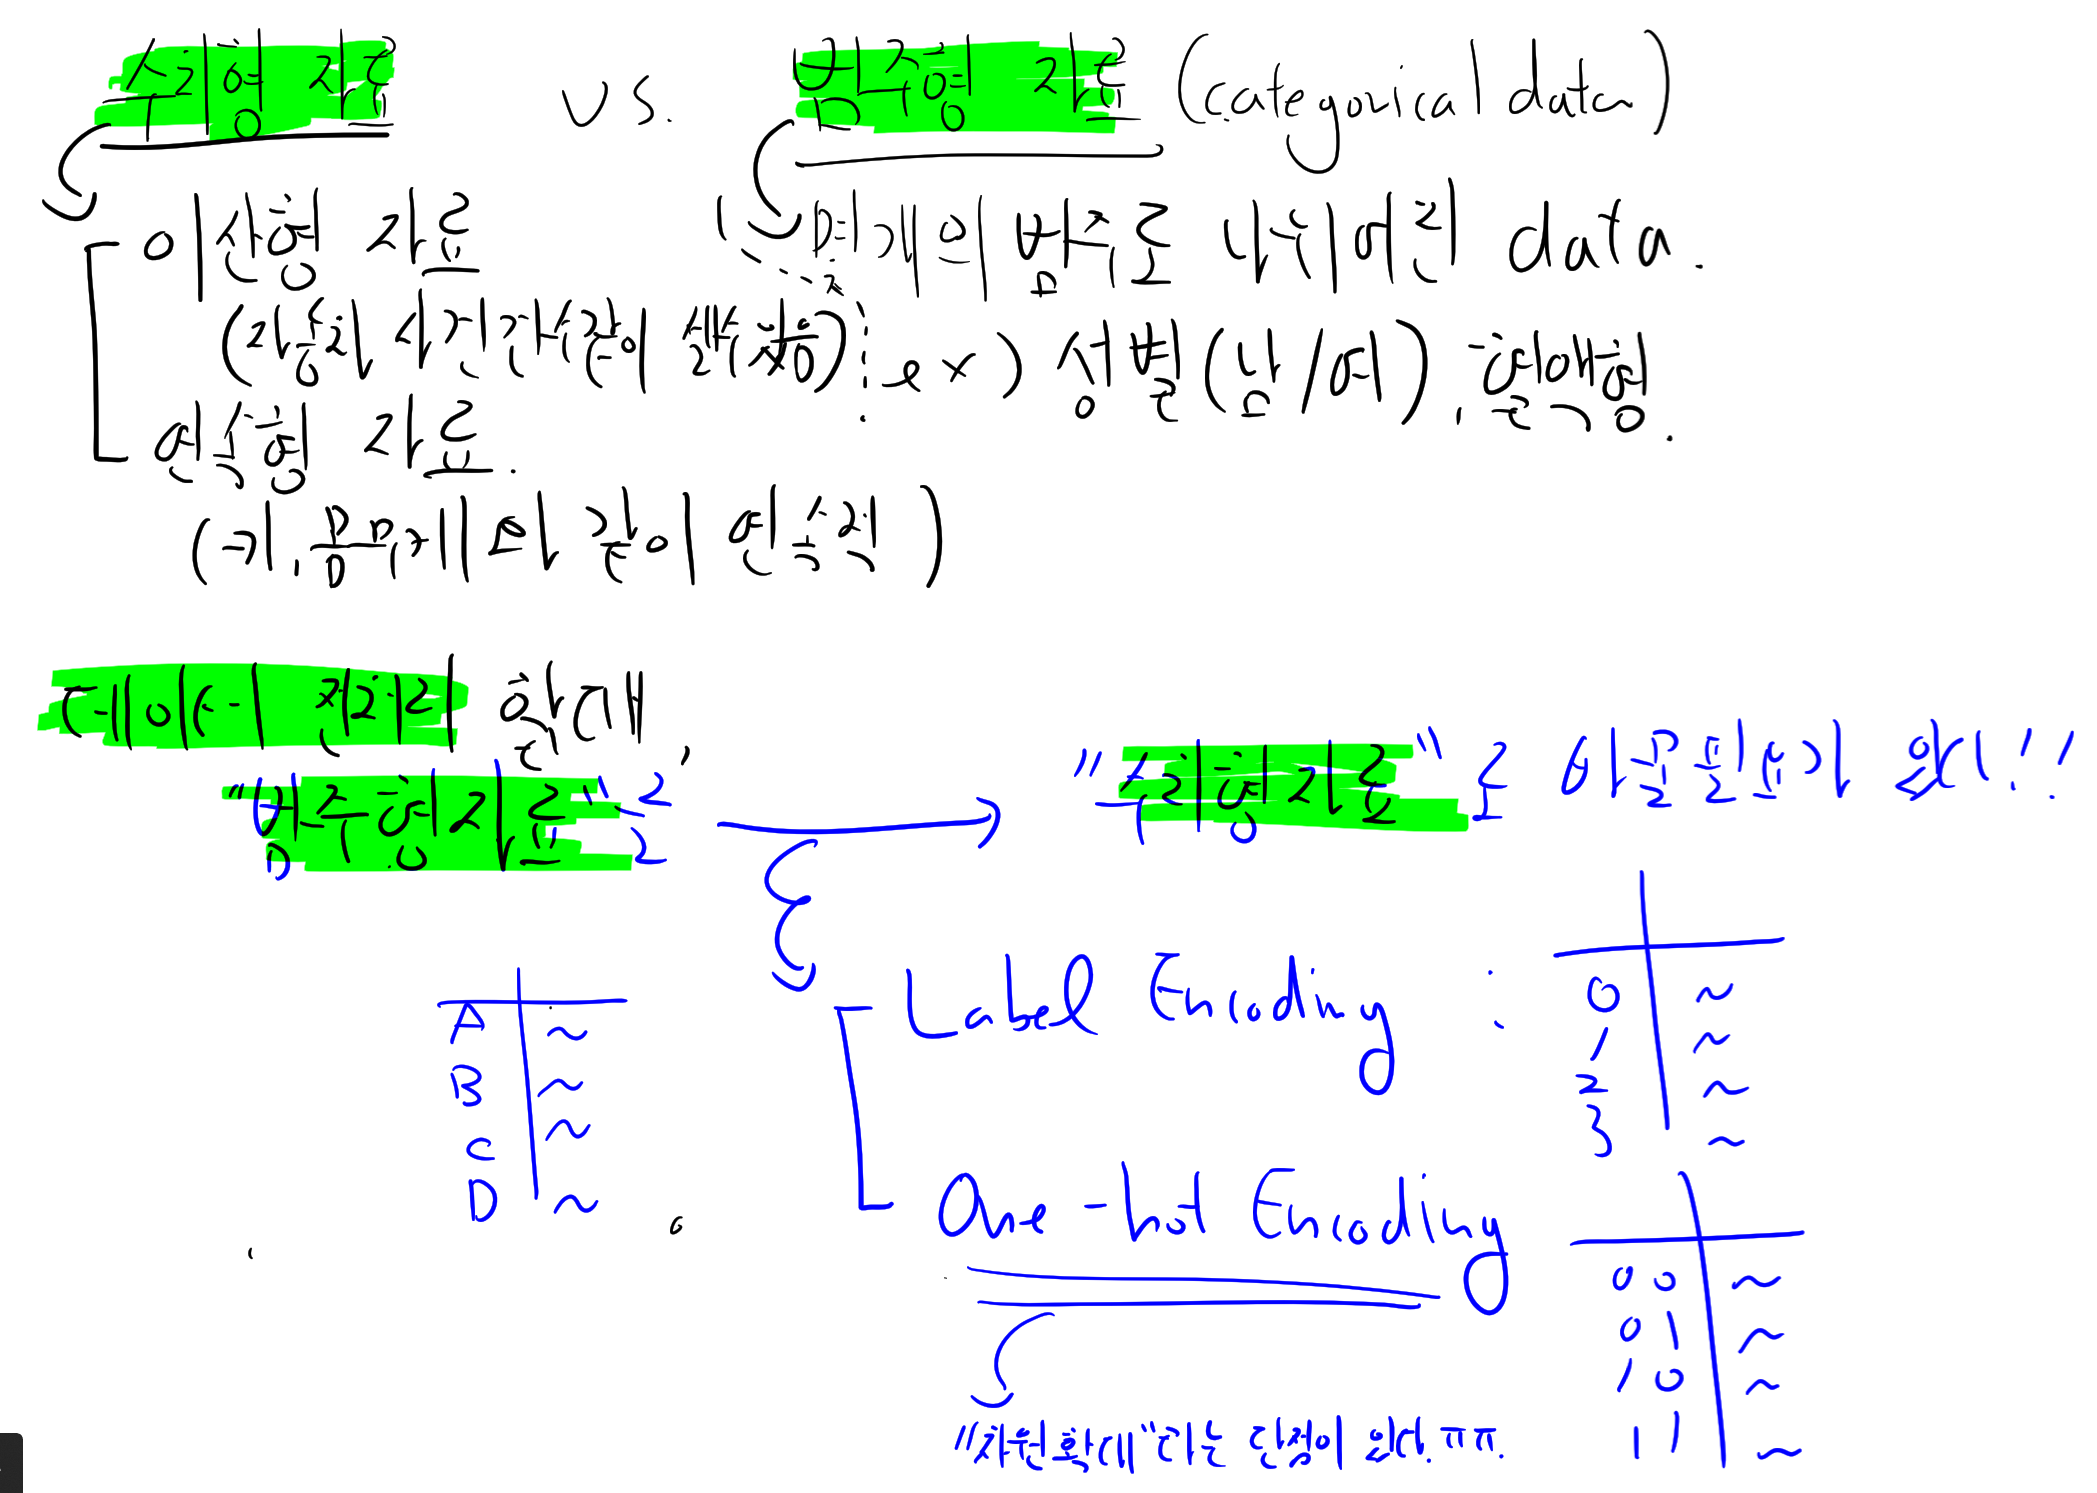

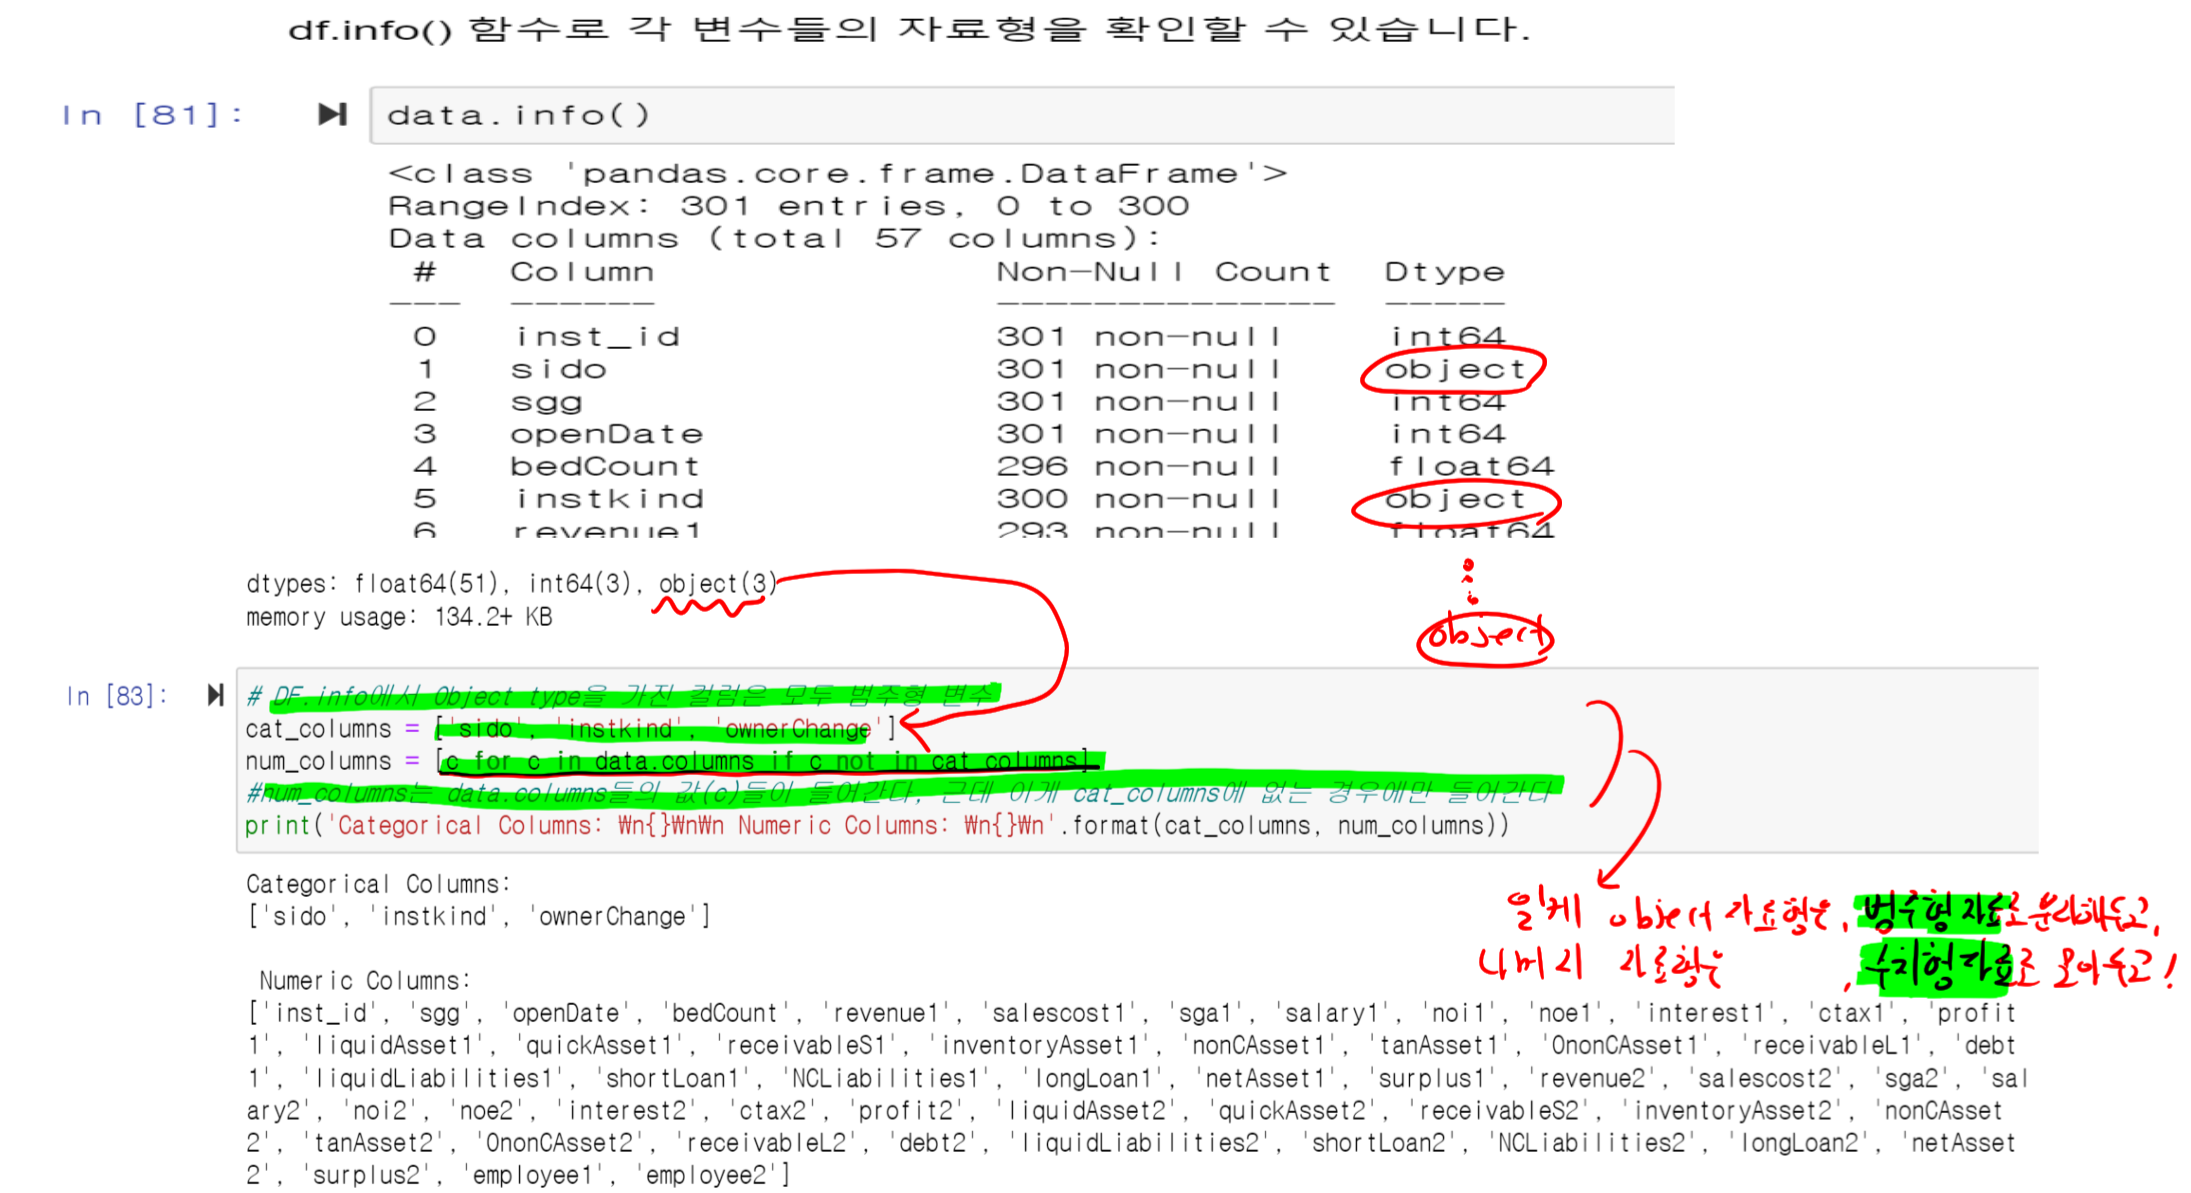

# Scaling
## 스케일링을 왜 해야할까요?
변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.<br>
Sklearn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다.
### 1. Min-Max Scaling
- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 
수식을 직관적으로 이해해보면, X에 존재하는 어떤 가장 작은 값 x <sub>m</sub>에 대해서 x <sub>m</sub>는 Min(X)의 값과 같습니다. <br>
따라서 스케일링 후 x<sub>m</sub>은 0이되고, X에 존재하는 어떤 가장 큰 값x <sub>M</sub>은 분모의 식과 같아지므로 1이됩니다.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$ 

Sklearn에서 Min-Max Scaler는 preprocessing 패키지에 있습니다.

#### 1) 모델 불러오기 및 정의하기

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler#minmax와 standard둘다 부를 수 있는 것 주의!
mMscaler = MinMaxScaler()#MinMaxScaler는 객체이다 여기선

#### 2) 데이터에서 특징 찾기(Min, Max 값)

In [13]:
numeric_data = data[num_columns].values #num_columns가 현재 수치형 자료!
#values로 빼오면서, numpy자료로 넘어온다!!, 이것을 numeric data에다 저장
mMscaler.fit(numeric_data)#data를 model에 학습시킨다는 것을 fitting
#그리고, scaling 하면서 결측치들은(NaN)그냥 날라간다. 그러므로, 결측치 처리를 해주고 가장 마지막에
#scaling을 한다 생각!

MinMaxScaler()

#### 3) 데이터 변환

In [14]:
mMscaled_data = mMscaler.transform(numeric_data)
mMscaled_data = pd.DataFrame(mMscaled_data, columns=num_columns)

#### 4) 결과 살펴보기

In [15]:
data[num_columns].head()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,1,73,20071228,175.0,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,...,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0
1,3,32,19970401,410.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0
2,4,89,20161228,468.0,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0
3,7,141,20000814,353.0,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,...,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0
4,9,32,20050901,196.0,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,...,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0


In [16]:
mMscaled_data.head()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,0.000000,0.406780,0.745497,0.266768,0.027931,0.000000,0.038458,0.031761,0.001712,0.001754,...,0.0,0.008920,0.003255,0.000000,0.010409,0.011977,0.156855,0.056834,0.051667,0.053333
1,0.004684,0.175141,0.487286,0.625000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667500,0.677500
2,0.007026,0.497175,0.975981,0.713415,0.006652,0.005233,0.004342,0.004629,0.000008,0.000003,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.138809,0.039006,0.195000,0.000833
3,0.014052,0.790960,0.565172,0.538110,0.480181,0.000000,0.686188,0.496381,0.055360,0.145005,...,0.0,0.443714,0.248560,0.524017,0.402618,0.463738,0.228058,0.147560,0.552500,0.552500
4,0.018735,0.175141,0.693441,0.298780,0.324792,0.000000,0.462680,0.381987,0.012287,0.163369,...,0.0,0.604459,0.439216,1.000000,0.414726,0.433274,0.138847,0.165576,0.171667,0.164167


## 2. Standard Scaling
데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다. `z-score 정규화` 라고도 합니다.<br>
데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, mean(X) $$
$$ \sigma : 데이터의\ 표준편차, std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$
Sklearn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

#### 1) 모델 불러오기 및 정의하기

In [17]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

#### 2) 데이터에서 특징 찾기(Mean, Std 값)

In [18]:
sdscaler.fit(numeric_data)

StandardScaler()

fit()이란 정규화 즉, 통계에서 정규분포를 만들게 하기 위해서 𝑥 값에서 평균을 빼고 그 값을 다시 표준편차로 나누어주는 작업을 하는데 이 작업을 하기 위해 평균 𝜇과  표준편차 𝜎를 계산하는 작업이 fit() 이고, transform()은 정규화 작업을 해주는 것입니다.

#### 3) 데이터 변환

In [19]:
sdscaled_data = sdscaler.transform(numeric_data)
sdscaled_data = pd.DataFrame(sdscaled_data, columns=num_columns)

#### 4) 결과 살펴보기

In [20]:
data[num_columns].head()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,1,73,20071228,175.0,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,...,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0
1,3,32,19970401,410.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0
2,4,89,20161228,468.0,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0
3,7,141,20000814,353.0,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,...,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0
4,9,32,20050901,196.0,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,...,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0


In [21]:
data[num_columns].describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


In [22]:
sdscaled_data.head()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,-1.801624,-0.158001,0.237663,0.246714,-0.424705,-0.270546,-0.427222,-0.448635,-0.317057,-0.468889,...,-0.058521,-0.589240,-0.536090,-0.512165,-0.514632,-0.509191,-0.245933,0.062510,-0.503681,-0.466358
1,-1.785099,-0.963740,-0.897900,2.226114,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.117507,4.500509
2,-1.776837,0.156434,1.251288,2.714647,-0.582202,-0.201331,-0.662844,-0.663943,-0.336503,-0.483254,...,-0.058521,-0.649782,-0.568935,-0.512165,-0.584744,-0.594788,-0.488592,-0.209073,0.571887,-0.884131
3,-1.752050,1.178346,-0.555374,1.746004,2.922747,-0.270546,4.046372,3.238344,0.295391,0.706596,...,-0.058521,2.361813,1.939099,2.614795,2.127139,2.719372,0.711531,1.444671,3.254552,3.505810
4,-1.735526,-0.963740,0.008731,0.423596,1.772591,-0.270546,2.502698,2.330576,-0.196333,0.857292,...,-0.058521,3.452830,3.862868,5.455120,2.208692,2.501653,-0.488076,1.719138,0.396794,0.415609


In [23]:
sdscaled_data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,3.010000e+02,3.010000e+02,3.010000e+02,2.960000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,293.000000,293.000000,2.930000e+02,293.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.910000e+02,2.880000e+02
mean,1.888486e-16,-9.442428e-17,9.607671e-15,4.800964e-17,3.031326e-17,1.818795e-17,-2.425061e-17,-2.425061e-17,-4.850121e-17,-1.515663e-17,...,0.000000,0.000000,9.700242e-17,0.000000,-3.637591e-17,-4.850121e-17,-6.062651e-18,-6.062651e-18,7.325183e-17,-1.233581e-17
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001693e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,...,1.001711,1.001711,1.001711e+00,1.001711,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001723e+00,1.001741e+00
min,-1.801624e+00,-1.572957e+00,-3.040893e+00,-1.227308e+00,-6.314418e-01,-2.705465e-01,-6.928316e-01,-7.006740e-01,-3.365983e-01,-4.832821e-01,...,-0.058521,-0.649782,-5.689349e-01,-0.512165,-5.847444e-01,-5.947885e-01,-2.355144e+00,-8.033120e-01,-8.913852e-01,-8.907627e-01
25%,-8.845208e-01,-8.654788e-01,-4.404626e-01,-7.829956e-01,-4.720287e-01,-2.705465e-01,-5.078832e-01,-4.991689e-01,-3.263397e-01,-4.075817e-01,...,-0.058521,-0.547424,-5.268498e-01,-0.512165,-5.813993e-01,-5.947885e-01,-3.943206e-01,-2.090732e-01,-5.568337e-01,-5.343287e-01
50%,9.041743e-02,-1.186965e-01,2.365146e-01,-7.757109e-02,-3.606538e-01,-2.422941e-01,-3.787456e-01,-3.710526e-01,-2.821193e-01,-3.102214e-01,...,-0.058521,-0.347901,-3.546513e-01,-0.483191,-3.271433e-01,-3.533595e-01,-2.203929e-01,-2.090732e-01,-3.911213e-01,-3.668876e-01
75%,8.422765e-01,8.246075e-01,6.858317e-01,3.983273e-01,-6.536816e-03,-1.482874e-01,2.992775e-02,8.789668e-02,-8.062681e-02,-8.620512e-02,...,-0.058521,0.025448,7.429374e-02,0.019644,5.678339e-02,1.426672e-01,8.927612e-03,-1.874007e-01,2.435886e-01,2.365635e-01
max,1.726331e+00,1.905477e+00,1.356919e+00,4.298167e+00,6.770326e+00,1.295576e+01,6.213733e+00,7.234799e+00,1.107935e+01,7.722500e+00,...,17.088007,6.137460,9.521322e+00,5.455120,6.150873e+00,6.551831e+00,1.109178e+01,1.443104e+01,6.612573e+00,7.066834e+00


기존 데이터에서는 변수별로 서로 다른 평균과 표준 편차 값을 가지고 있었습니다.<br>
Standard 스케일링된 데이터를 살펴보면, 평균이 0 표준편차(std)가 1이 되었음을 확인할 수 있습니다.

# Imputation
## 대표 값을 사용한 결측치 처리
정형 데이터를 다루다보면, 값이 NaN(Not a Number or Null)으로 되어있는 경우가 있습니다. 이러한 값을 결측치라 하며, <br>
가장 간단한 방법으로 평균이나 중간값 또는 최빈값 같은 변수의 대표값을 사용할 수 있습니다. <br><br>

결측치를 확인하는 방법으로 missingno 라이브러리의 `matrix()` 메소드를 사용하거나 Pandas의 `isna() + sum()` 메소드를 사용할 수 있습니다.

<AxesSubplot:>

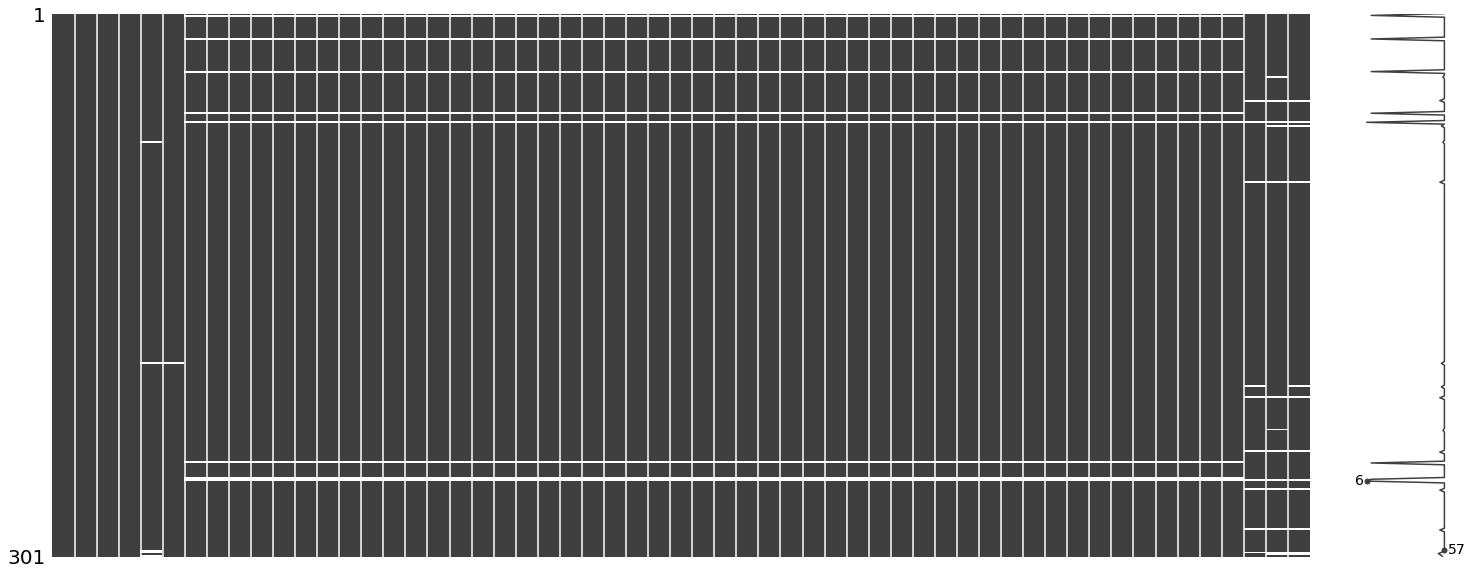

In [24]:
import missingno as msno

msno.matrix(data)

In [25]:
pd.isna(data) #각원소들에 대해서 각각 null값인지 아닌지가 나온다

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [26]:
pd.isna(data).sum()

inst_id                0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8
liquidAsset2           8


In [27]:
pd.isna(data).sum().sum()#이건 걍 null 값의 전체 개수이다

425

In [28]:
data.head()

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


### 1. Mean(평균)

확률 이론과 통계 관점에서 (모)평균 또는 기댓값은 중심에 대한 경향성을 알 수 있는 척도입니다.<br>
일반적으로 평균이라고 부르는 것으로 산술 평균이라고 하고, 이 평균은 표본 평균이라고도 합니다.<br>
평균은 모든 관측치의 값을 모두 반영하므로 `지나치게 작거나 큰 값(이상치)들의 영향을 많이` 받게 됩니다.<br>
평균은 모든 샘플의 값을 더하고, 샘플의 개수로 나누어 계산할 수 있습니다.<br>

$$ E(x) = {\sum x \over n}$$

In [29]:
mean_df = data.copy()

In [30]:
mean_df.head()

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [31]:
for c in num_columns:#num_colums(수치형 변수)를 하나씩 꺼내서 볼거다(1.각 column을 하나씩 가져와서)
    mean_df.loc[pd.isna(data[c]), c] = data[c].mean()#(2.그 column에 null값이 있는 행을 뽑고)(3.그행에 그 column의 평균을 넣는다)

In [32]:
pd.isna(mean_df[num_columns]).sum()#위에 코드를 통해, 아래와 같이 null값이 없어진 것을 알 수 있다

inst_id               0
sgg                   0
openDate              0
bedCount              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2          0
inventoryAsset2       0
nonCAsset2      

In [33]:
mean_df.head()#위에 mean_df.hea()에서 있덛 NaN 값들 다 사라진것 확인하기!

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1.0,choongnam,73.0,20071228.0,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3.0,gyeongnam,32.0,19970401.0,410.0,general_hospital,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,...,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,801.0,813.0,same
2,4.0,gyeonggi,89.0,20161228.0,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7.0,incheon,141.0,20000814.0,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9.0,gyeongnam,32.0,20050901.0,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


### 2. Median(중간값) 
중간값은 데이터 샘플을 개수에 대해서 절반으로 나누는 위치의 값을 말합니다. <br>
데이터 샘플의 수가 짝수개일 때에는 중간에 위치한 두 값의 평균을 사용합니다.<br>
중간값은 모든 관측치의 값을 모두 반영하지 않으므로 `지나치게 작거나 큰 값(이상치)들의 영향을 덜` 받습니다.<br>
중간값은 샘플을 값에 대해 정렬하고, 중앙에 위치한 값으로 구할 수 있습니다.

In [34]:
median_df = data.copy()

In [35]:
for c in num_columns:
    median_df.loc[pd.isna(data[c]), c] = data[c].median()

In [36]:
pd.isna(median_df[num_columns]).sum().sum()

0

In [37]:
median_df.head(2)

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1.0,choongnam,73.0,20071228.0,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.0,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3.0,gyeongnam,32.0,19970401.0,410.0,general_hospital,5.524218e+09,210410492.0,4.684074e+09,2.659892e+09,...,3.784553e+09,1.454050e+09,85425488.0,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,801.0,813.0,same


### 3. Iterative Impute (R 언어의 MICE 패키지)
Round robin 방식으로 반복하여 결측값을 회귀하는 방식으로 결측치를 처리합니다. <br>
결측값을 회귀하는 방식으로 처리하기 때문에 수치형 변수에만 적용할 수 있습니다.

###### ==> Round Robin에 대한 간단한 설명

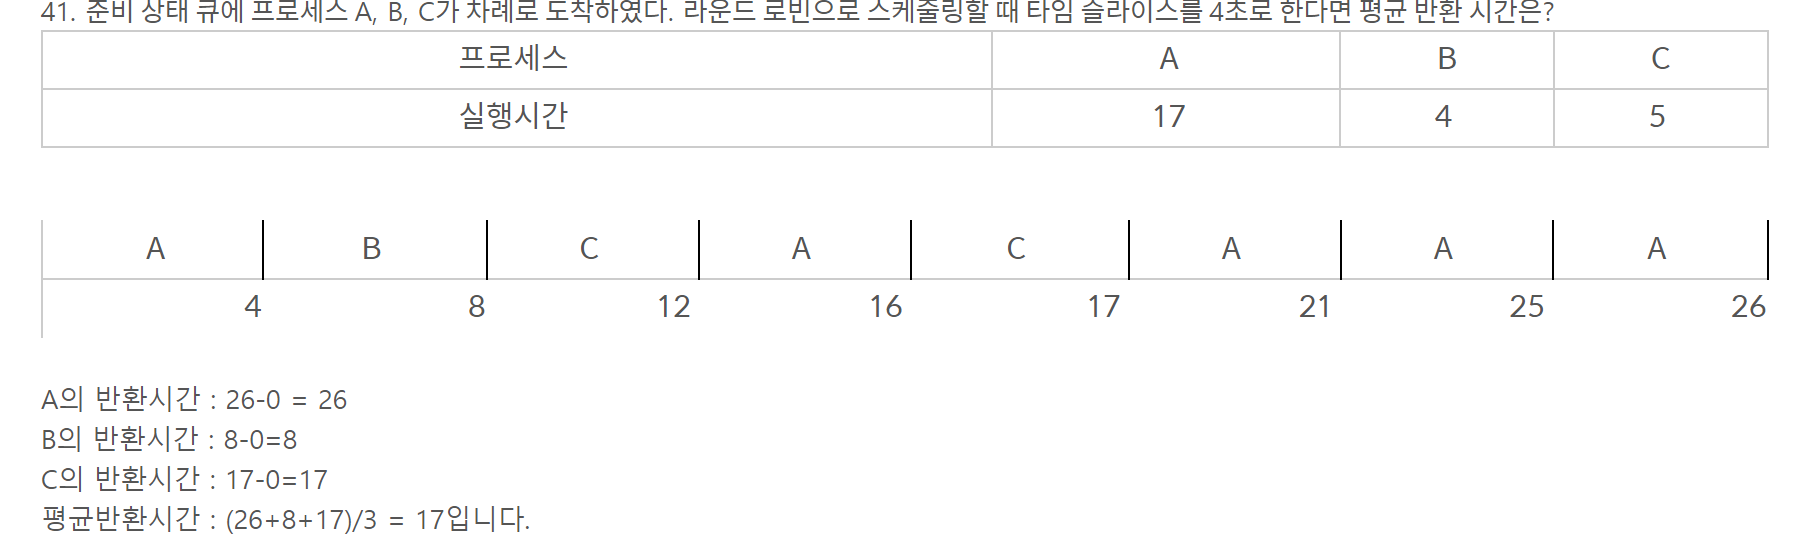

###### ==> Round Robin에 대한 간단한 설명

In [38]:
from sklearn.experimental import enable_iterative_imputer#아직 실험버전이여서 이렇게 나옴 ㅠㅠ
from sklearn.impute import IterativeImputer #밑에 markdown과 비교

from sklearn.preprocessing import MinMaxScaler, StandardScaler 

sdscaler = StandardScaler()

In [39]:
impute_df = data.copy()

In [40]:
imp_mean = IterativeImputer(random_state=0)#이렇게 객체를 만든다
impute_df[num_columns] = imp_mean.fit_transform(impute_df[num_columns])#fit과 transform을 한번에 하는것!!

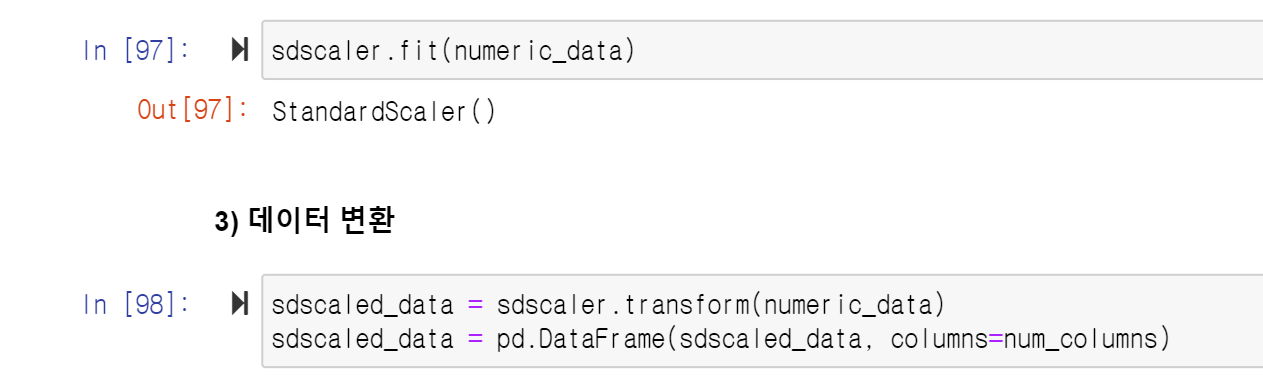

In [41]:
pd.isna(impute_df[num_columns]).sum().sum()

0

### 4. Mode(최빈값)
최빈값은 범주형 변수에서 가장 자주 등장하는 값을 말합니다.<br>

In [42]:
mode_df = data.copy()

In [43]:
for c in cat_columns:
    mode_df.loc[pd.isna(data[c]), c] = data[c].mode()[0] #일케 뒤에"[0]"붙는것 걍 암기!!

In [44]:
pd.isna(mode_df[cat_columns]).sum()

sido           0
instkind       0
ownerChange    0
dtype: int64

# Dimensionality Reduction
## 차원 축소는 왜 해야할까요? - 차원의 저주
차원의 저주는 저차원에서는 일어나지 않는 현상들이 고차원에서 데이터를 분석하거나 다룰 때 생겨나는 현상을 말합니다.<br>
고차원으로 올라갈 수록 공간의 크기가 증가하게 되는데, 데이터는 해당 공간에 한정적으로 위치되어 빈 공간이 많아지기 때문에 발생합니다.<br>
이러한 이유로 데이터의 차원이 너무 큰 경우에는 필요없는 변수를 제거하고, 과적합을 방지하기위해 데이터의 차원을 축소합니다. <br>
또는, 사람이 인식할 수 있는 차원은 3차원이 최대이므로 데이터의 시각화를 위해 차원을 축소하기도 합니다.

![CurseofDimensionality](./img/Curse_of_Dimensionality.png)

## 주 성분 분석 (Principal Component Analysis, PCA)
대표적인 차원 축소 기법으로 주 성분 분석(이하, PCA)이라는 방법이 있습니다.<br>
PCA는 여러 차원으로 이루어진 데이터를 가장 잘 표현하는 축으로 Projection 해서 차원을 축소하는 방식을 사용합니다.<br>
데이터를 가장 잘 표현하는 축이란, 데이터의 분산을 잘 표현하는 축이라고 할 수 있습니다.<br>
기본적으로 주성분(Principal Component, PC)은 데이터 셋을 특이값 분해를 통해 추출된 고유 벡터입니다.<br>
각 고유 벡터들은 서로 직교성을 띄기 때문에 데이터를 주성분 벡터로 사영(Projection) 시키면 서로 독립적인 변수로 데이터를 표현할 수 있습니다.<br>
PCA의 단점으로는 떨어뜨린 주성분이 어떤 컬럼인지를 설명할 수 없다는 점이 있습니다. 

#### 주 성분 분석의 단계
1. 각 컬럼들의 값의 범위를 평균과 표준편차를 사용해 표준 정규화시켜 변수들의 분산을 동일하게 만들어줍니다.
2. 데이터의 공분산을 계산합니다.
3. 공분산 행렬에 대해 특이값 분해를 하여 주성분(고유 벡터)과 고유 값을 얻어냅니다.
4. 주성분과 대응되는 고유 값은 주성분이 데이터의 분산을 표현하는 정도의 척도로 사용되므로, 고유 값의 크기와 비율을 보고 몇개의 주성분을 선택할 것인지 또는 원하는 차원의 개수만큼의 주성분을 선택합니다.
5. 선택한 주성분으로 모든 데이터를 Projection시켜 데이터의 차원을 축소합니다.

#### Projection(사영)
Projection에 대해 간단히 짚고 넘어가겠습니다. <br>
벡터 공간에서 어떤 벡터 a와 b가 있을 때 벡터 b를 벡터 a에 사영한 결과(x)는 아래 그림과 같습니다.<br>
벡터 b를 벡터 a에 사영한다는 것은 벡터 a에 대해 수직인 방향으로 벡터 b를 떨어뜨리는 것을 의미합니다.<br>
간단히 말해서, 벡터 b의 그림자를 벡터 a에 떨어뜨린 것을 생각하시면 편합니다.

![Projection](./img/Projection.png)

PCA의 기본 원리는 변수의 분산을 가장 잘 표현하는 벡터(축)를 찾아 해당 벡터에 데이터들을 사영 시키는 것입니다.

https://angeloyeo.github.io/2019/07/27/PCA.html  

주성분 분석 설명

In [45]:
from sklearn.datasets import load_digits #mnist data와 유사
digits = load_digits()

이번에는 sklearn의 내장 데이터인, 64차원(8\*8) digit(숫자 이미지)데이터를 pca를 통해 2차원으로 떨어뜨려 시각화를 통해 살펴보겠습니다.

In [46]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [47]:
data = digits.data
label = digits.target

In [48]:
data.shape

(1797, 64)

숫자 이미지가 64 차원 벡터로 표현되어 있으므로 이미지를 확인하기 위해서는 (8,8) 행렬로 변환해주어야 합니다.

Label : 0


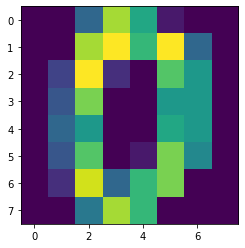

In [50]:
import matplotlib.pyplot as plt
plt.imshow(data[0].reshape((8,8)))#64차원임
print('Label : {}'.format(label[0]))

0번째 데이터는 이미지 상으로 0으로 보이고, 라벨도 0인 것을 확인하였습니다.<br>
pca를 통해 64차원 데이터를 2차원 데이터로 차원을 축소 시키겠습니다.<br>
cf)64차원 -> 2차원 축소 중간에 standard scaling한번 해준다

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#### 1) 모델 불러오기 및 정의하기

In [52]:
from sklearn.decomposition import PCA
# n_components에 정수를 입력하면, 주성분의 개수를 입력할 수 있는 것이고,
#실수를 입력하면, 주성분의 고유값이 데이터의 80% 이상을 고른다#실수는 보통 0.9로 둔다
pca = PCA(n_components=2)

#### 2) 데이터에서 특징 찾기 (주 성분 찾기)

In [53]:
pca.fit(scaled_data)

PCA(n_components=2)

#### 3) 데이터 변환 (주 성분으로 데이터 사영하기)

In [54]:
new_data = pca.transform(scaled_data)

#### 4) 결과 살펴보기

In [55]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('\nPCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)

PCA를 거친 데이터의 차원 
(1797, 2)


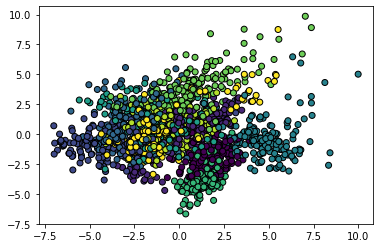

In [56]:
plt.scatter(new_data[:,0], new_data[:, 1], c=label, linewidth=1, edgecolor='black')
plt.show() #밑에 2차원 형태로 줄어든것 확인!!!

# Categorical Variable to Numeric Variable 
이번에는 범주형 변수를 수치형 변수로 나타내는 방법에 대해 알아보겠습니다. <br>
여기에서 범주형 변수란, 차의 등급을 나타내는 [소형, 중형, 대형] 처럼 표현되는 변수를 말합니다. <br>
범주형 변수는 주로 데이터 상에서 문자열로 표현되는 경우가 많으며, 문자와 숫자가 매핑되는 형태로 표현되기도 합니다.<br>

## 1. Label Encoding
라벨 인코딩은 n개의 범주형 데이터를 0~n-1 의 연속적인 수치 데이터로 표현합니다.<br>
예를 들어, 차의 등급 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : 0 <br>
중형 : 1 <br>
대형 : 2 <br>
라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이라는 의미가 아님을 주의하셔야 합니다. 

Label Encoding과 Sklearn의 preprocessing 패키지에 있습니다.<br>
이번에는 병원 개/폐업 데이터의 target이었던, OC 변수를 수치형 변수로 변환하겠습니다.

In [57]:
data = pd.read_csv(example_file)
label = data['OC']

label.head()

0    open
1    open
2    open
3    open
4    open
Name: OC, dtype: object

#### 1) 모델 불러오기 및 정의하기

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [59]:
le.fit(label)

LabelEncoder()

In [60]:
le.classes_ #close가 앞에 있으므로 close는 0으로 encoding, open이 1로 encoding

array([' close', 'open'], dtype=object)

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [61]:
label_encoded = le.transform(label)

#### 4) 결과 살펴보기

In [62]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), label_encoded.reshape((-1, 1))], axis=1), 
                      columns=['label', 'label_encoded'])
result.sort_values('label_encoded', inplace=True)
result.head(20)

,label,label_encoded
261,close,0
177,close,0
93,close,0
212,close,0
214,close,0
141,close,0
71,close,0
290,close,0
35,close,0
158,close,0


## 2. One-hot Encoding
원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현합니다. <br>
예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원핫 인코딩을 통해 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : [1, 0, 0] <br>
중형 : [0, 1, 0] <br>
대형 : [0, 0, 1] <br>
원핫 인코딩으로 범주형 데이터를 나타내게되면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. <br> 
이는 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현할 수 있게 됩니다.

One-hot Encoding은 Sklearn의 preprocessing 패키지에 있습니다.

Sklearn의 One-hot Encoder는 numpy 행렬로 입력을 넣어줘야 정상적으로 작동하므로, pandas DataFrame에서 numpy-array로 추출하여 사용합니다.


#### 1) 모델 불러오기 및 정의하기

In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)#밑에 for study 와 비교!!, 그리고 밑에 3)데이터 변환 쪽에서 두개 비교함.
for_study = OneHotEncoder()

sparse = True를 하면 sparse matrix를 쓴다고 하는것이다<br> 만약, category개수가 5000개인데 one-hot encoding을 해야한다고 가정해보자, 그러면 "100000...0, 01000...0,... " 이렇게 category가 나오는데, 5000개중 4999개가 다 0이고, 딱 1개만 1이다.<br>그러므로 메모리 낭비가 매우 심한데, 이때 sparse = true로 해두면, 따로 sparse matrix를 사용해서, 1의 위치만 따로 저장해둔다. ex)100000...0 =>1로 저장, 01000...0=>2로저장
<br>하지만, 이렇게 category가 많은 경우는 거의 없다. 그러므로 그냥 sparse = false로 해둔다 보통의 경우에

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [64]:
ohe.fit(label.values.reshape((-1, 1)))# =>이건, label을 일단 values로 뽑으면, (301,) vector가 나오고, 그것을 reshape(-1,1)로 해줘서 넣어줘야
#one hot 에서는 오류가 안생김. 이건 one-hot에서만 생기는 문제로, 아직 sklearn이 다 완성되지 않아서 생기는 문제
#(-1,1)에서 -1은 n개의 차원 중 n-1개는 사용자가 지정하고 나머지는 알아서 가능한 차원에 맞추라는 의미입니다.
for_study.fit(label.values.reshape((-1, 1)))

OneHotEncoder()

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [65]:
one_hot_encoded = ohe.transform(label.values.reshape((-1,1)))
one_hot_encoded #밑에 코드와 비교하기!!

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [66]:
one_hot_encoded_for_study = for_study.transform(label.values.reshape((-1,1)))
one_hot_encoded_for_study

<301x2 sparse matrix of type '<class 'numpy.float64'>'
	with 301 stored elements in Compressed Sparse Row format>

#### 4) 결과 살펴보기

In [67]:
columns = np.concatenate([np.array(['OC']) , ohe.categories_[0]])
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), one_hot_encoded.reshape((-1, 2))], axis=1), 
                      columns=columns)
result.head(10)

,OC,close,open
0,open,0,1
1,open,0,1
2,open,0,1
3,open,0,1
4,open,0,1
5,open,0,1
6,open,0,1
7,open,0,1
8,open,0,1
9,open,0,1


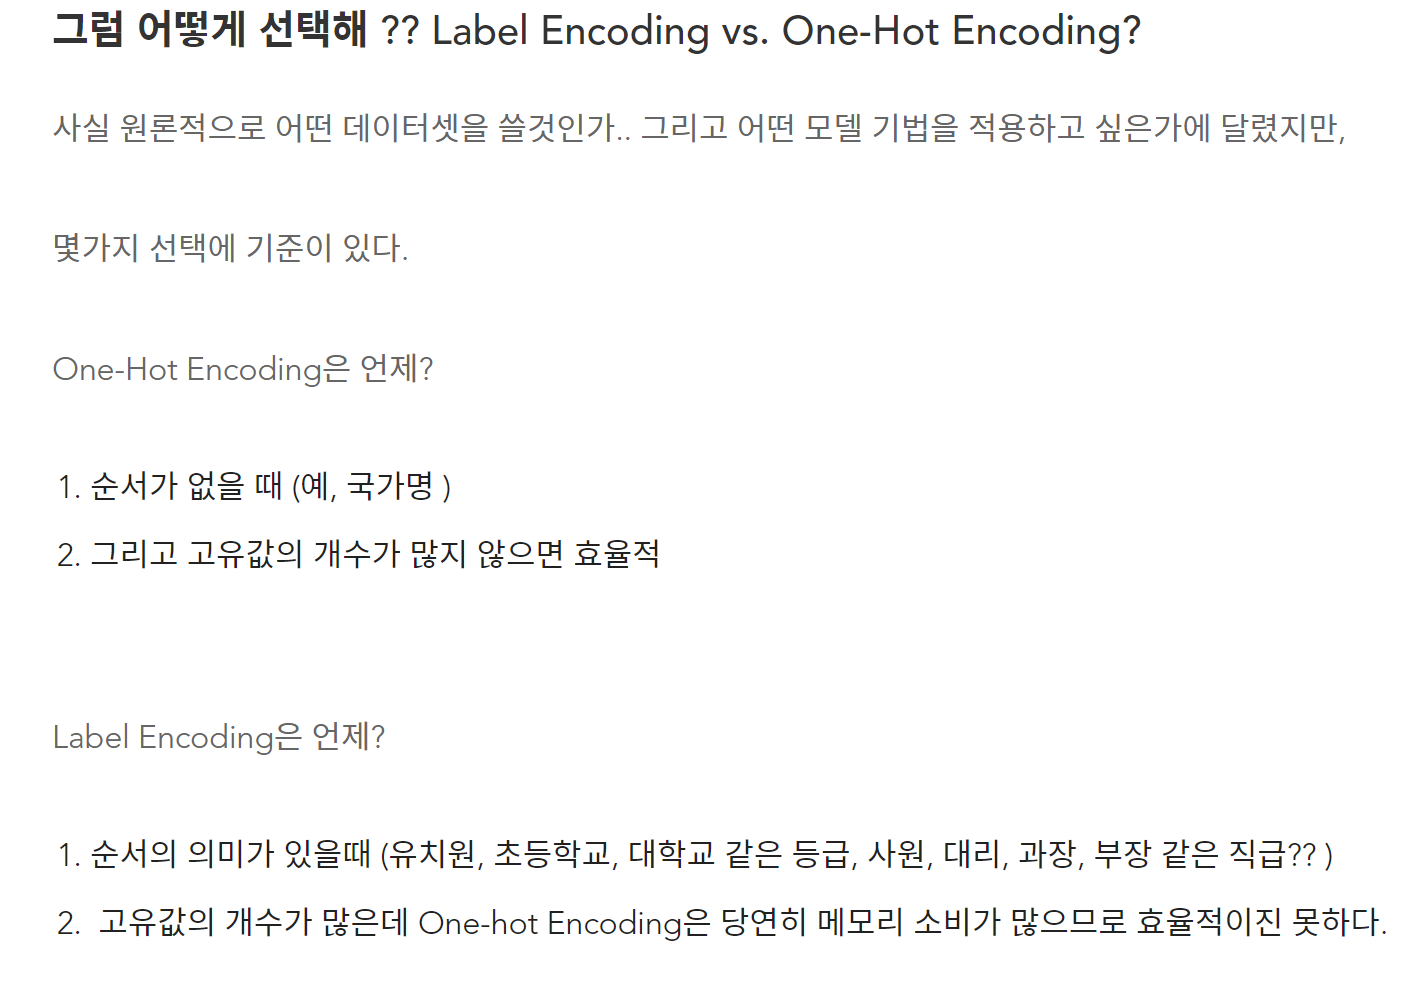

### Reference
- 병원 개/폐업 데이터셋 Dacon: https://dacon.io/competitions/official/9565/overview/
- UCI repository, Adult DataSet : https://archive.ics.uci.edu/ml/datasets/adult
- Wikipedia, z-score : https://ko.wikipedia.org/wiki/표준_점수 
- Curse of Dimension - https://wikidocs.net/7646
- Wikipedia, PCA - https://ko.wikipedia.org/wiki/주성분_분석 
- Sklearn, Digits dataset : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html&sa=U&ved=0ahUKEwj334uTxODhAhWFgrwKHQBgDd4QFggQMAY&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw3dwyCabB7mxD5cEn2odXbC
- Sklearn, Min-Max Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
- Sklearn, Standard Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
- Sklearn, IterativeImputer : https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
- Sklearn, PCA : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA
- Sklearn, Label Encoder : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=label%20encoder#sklearn.preprocessing.LabelEncoder
- Sklearn, Onehot Encoder : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehot%20encoder#sklearn.preprocessing.OneHotEncoder